In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../../.."))
from charts.cohen import plot_cohen_kappa
from models.LLMOutput import ConfidenceType
from utils.helpers import print_prompts
from metrics.run import gather_data_for_run_ids
from charts.calibration import plot_confidence_calibration_curve
from metrics.agreement.krippendorff import compute_krippendorff_alpha
from charts.performance import (
    plot_precision,
    plot_recall,
    plot_f1_score,
    plot_support_counts,
    plot_precision_heatmap,
    plot_recall_heatmap,
    plot_f1_score_heatmap,
)
from metrics.results_analyzer import ResultsAnalyzer, visualize_results

# Analyzing results for experience #7


In [2]:
RUN_IDS = [
    # collectivités locales
    "670e93a4e8fe08746dffaeb9", # Zero-shot Vanilla
    "670e9411444e479c646f3fec", # Zero-shot verbalized confidence
#    "", # Zero-shot self-calibration
    "670e95ed4fc4f5de6facd6a6", # ERROR
    # collectivités territoriales
    "670eab3659b3275f4734c96e", # Zero-shot Vanilla
    "670eab36129b4473465aab80", # Zero-shot verbalized confidence
#    "" # Zero-shot self-calibration
]

RUN_INFOS = gather_data_for_run_ids(RUN_IDS)

The first three runs are based on a batch that contains 1250 PQs sampled from the dataset with labeled matching the following theme list :
- The first batch has 250 questions labeled as "collectivités locales" from the VIIIth and IXth parliamentary terms
- The second batch has 250 questions labeled as "collectivités territoriales" from the Xth to XVth parliamentary terms
Here is the themes distribution for the batch used in the experiment :


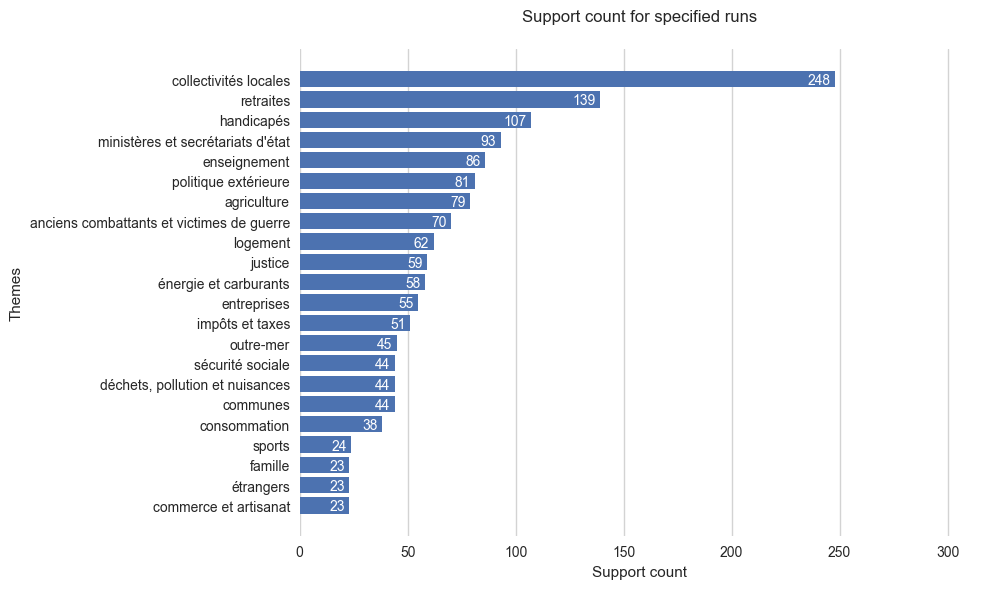

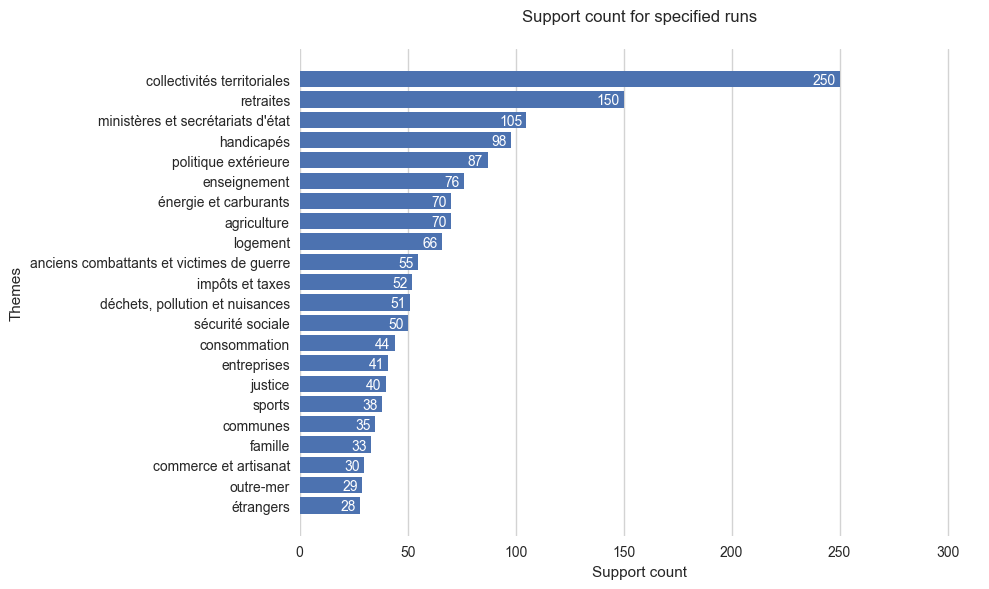

In [3]:
plot_support_counts(RUN_IDS, save_folder="images/experience_7/metrics")

Using this batch, we tried 3 different prompting strategy (all of them in french) :

- zero-shot
- zero-shot verbalized confidence
- zero-shot self-calibration

We only used one temperature setup for this run :
- 0.0

The following is the analysis for each prompting strategy used for experience #7. In that experiment, we mainly focus on how "collectivités locales" vs. "collectivités territoriales" are labeled properly and which confidence levels are registered on that task.

Our hypothesis is that contemporary categories ("collectivités territoriales") should have higher performance score than native ones ("collectivités locales").


## Zero-shot Vanilla ("Collectivités locales")

In [4]:
print_prompts(RUN_INFOS[0]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



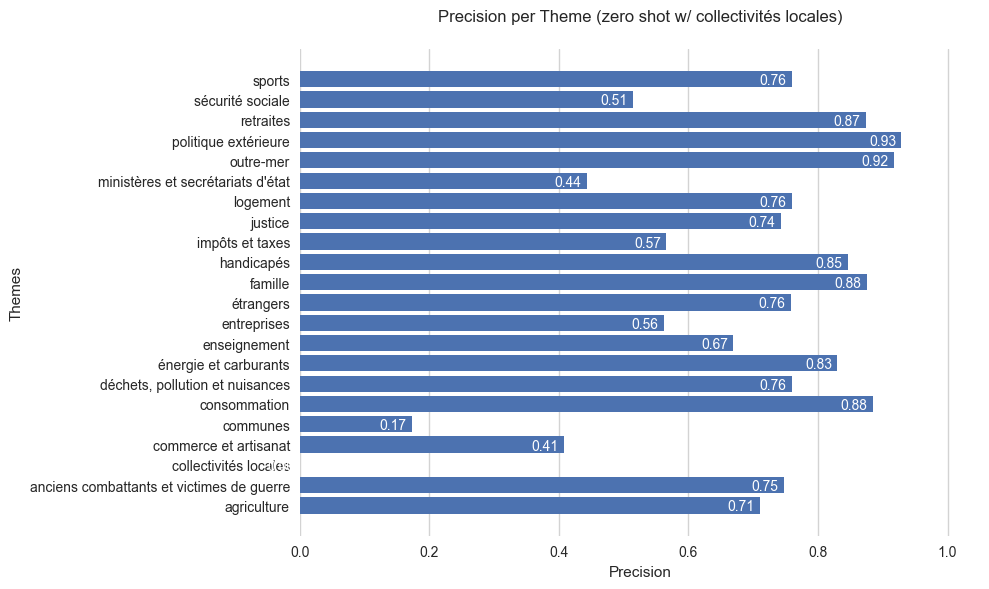

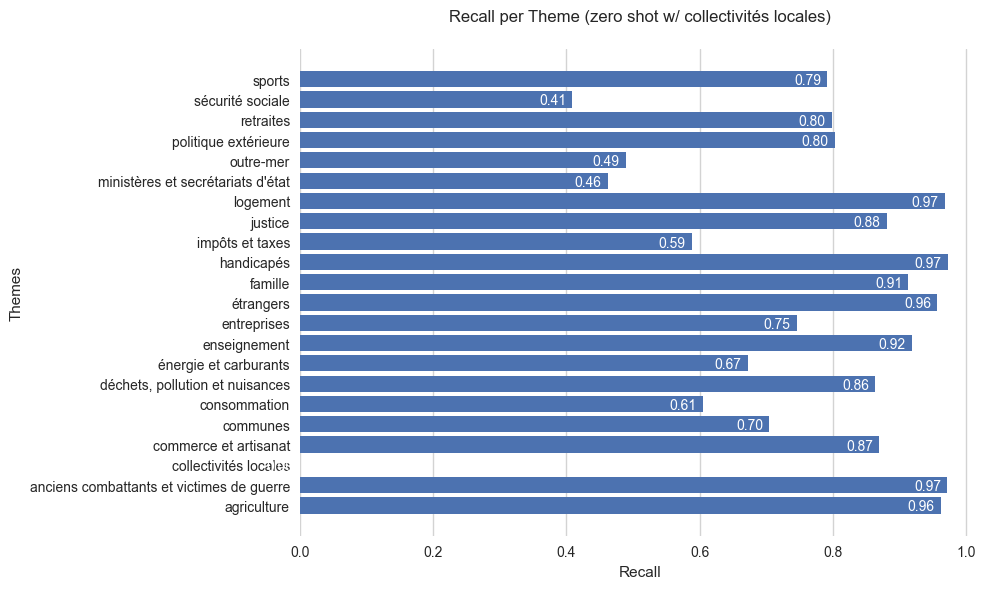

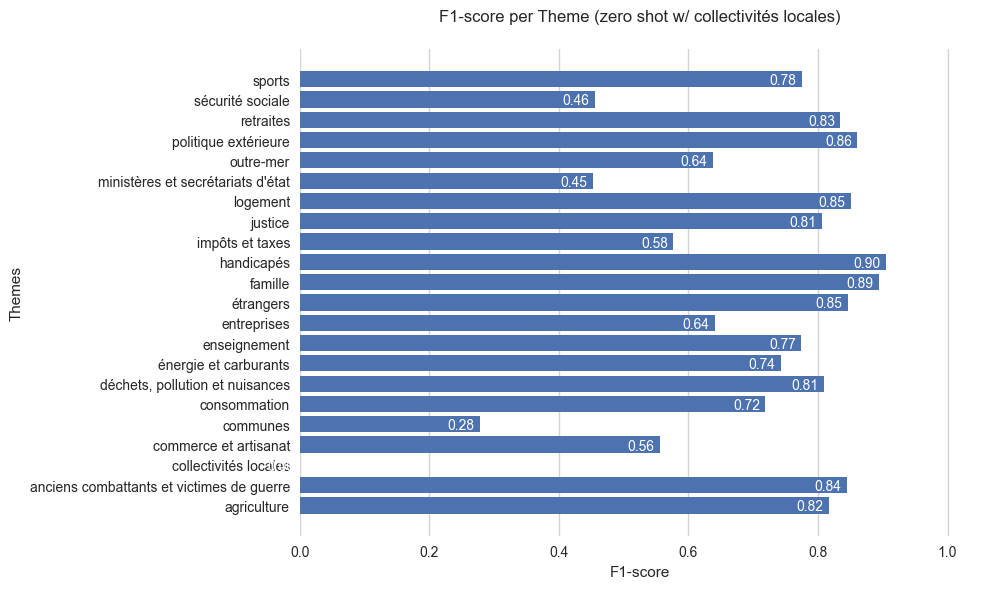

In [5]:
plot_precision(RUN_IDS[0], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[0], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[0], save_folder="images/experience_7/metrics")

(analysis)

## Zero-shot Verbalized Confidence ("Collectivités locales")

(prompting strategy description)


In [6]:
print_prompts(RUN_INFOS[1]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit deux choses :
- Le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.
- La probabilité que le thème choisi soit adéquat (entre 0.0 et 1.0)
Ne fournis que ces deux éléments, aucune autre explication ou mot complémentaire.
Par exemple: 

Thème: <le thème le plus adéquat pour annoter la question choisi par

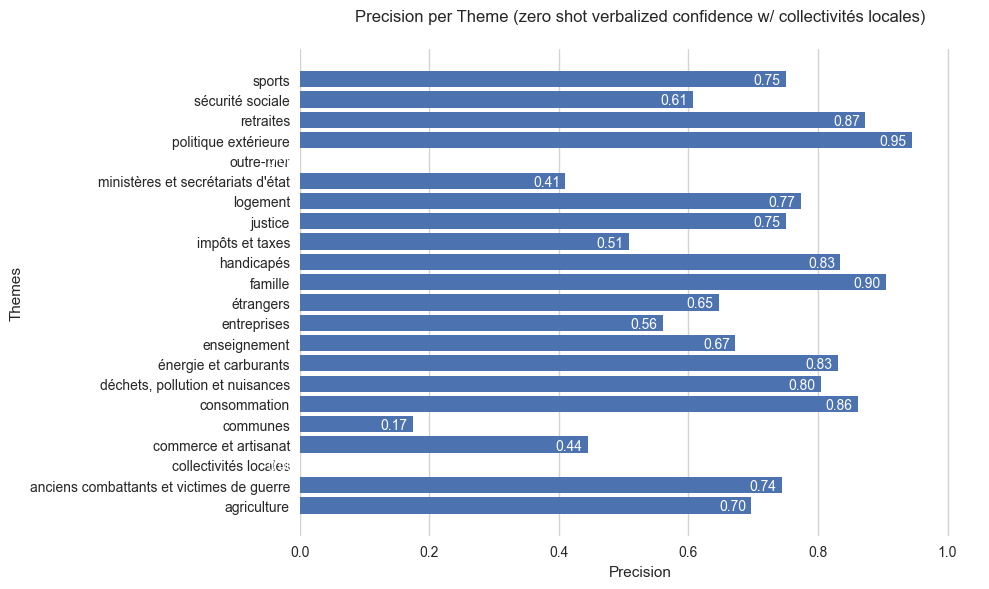

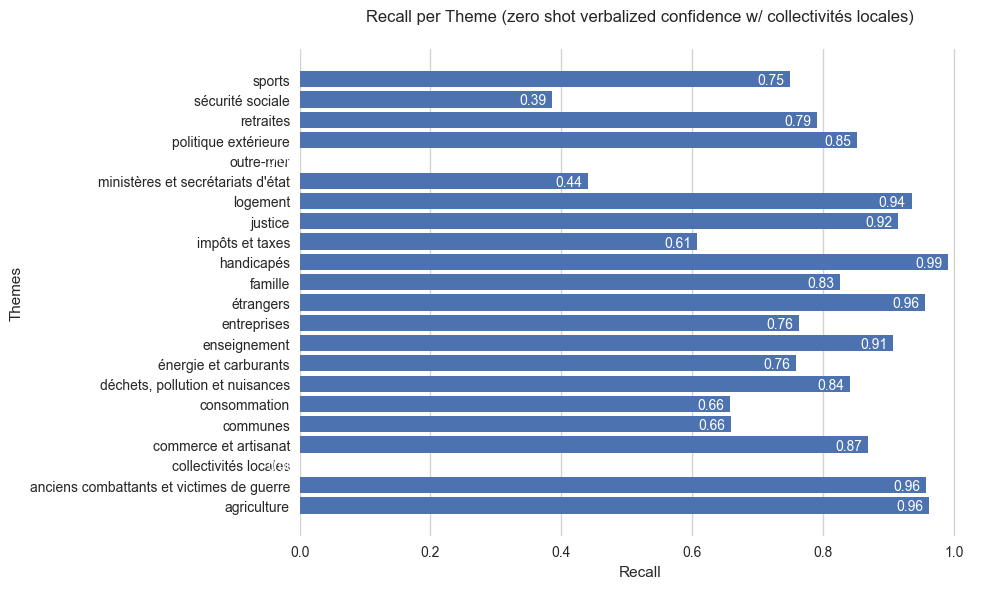

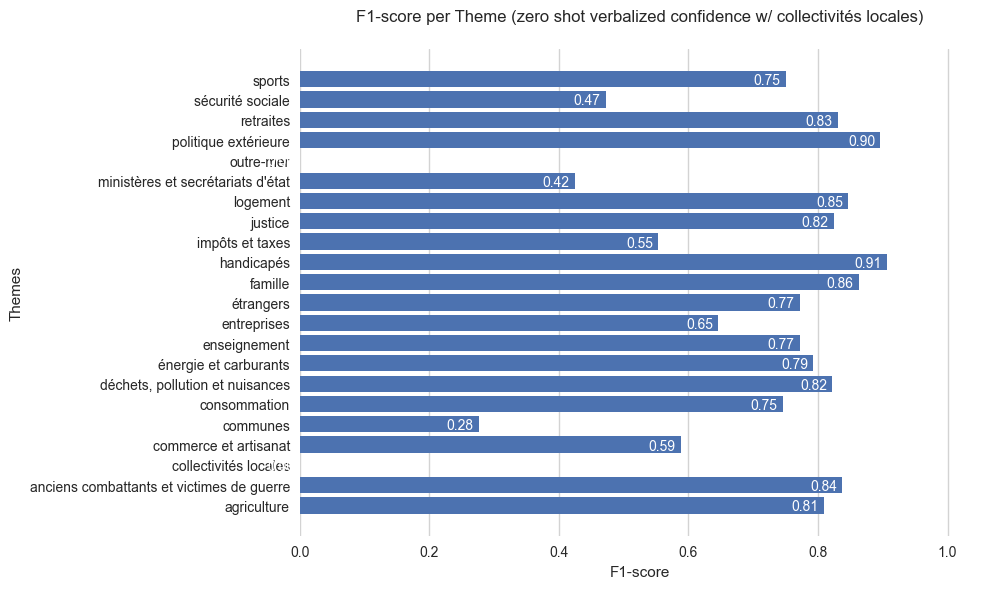

In [7]:
plot_precision(RUN_IDS[1], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[1], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[1], save_folder="images/experience_7/metrics")

(analysis)

## Zero-shot Self-Calibration ("Collectivités locales")

(prompting strategy description)


In [8]:
print_prompts(RUN_INFOS[2]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape. Voici un exemple de réflexion :


user: 
Mme Marie-Hélène Aubert souhaite attirer l'attention de M. le ministre de l'intérieur sur les conditions trop souvent indignes imposées aux sans-papiers contraints à une expulsion forcée. En effet, de nombreux témoignages dénoncent des méthodes inacceptables de la part de certains poli

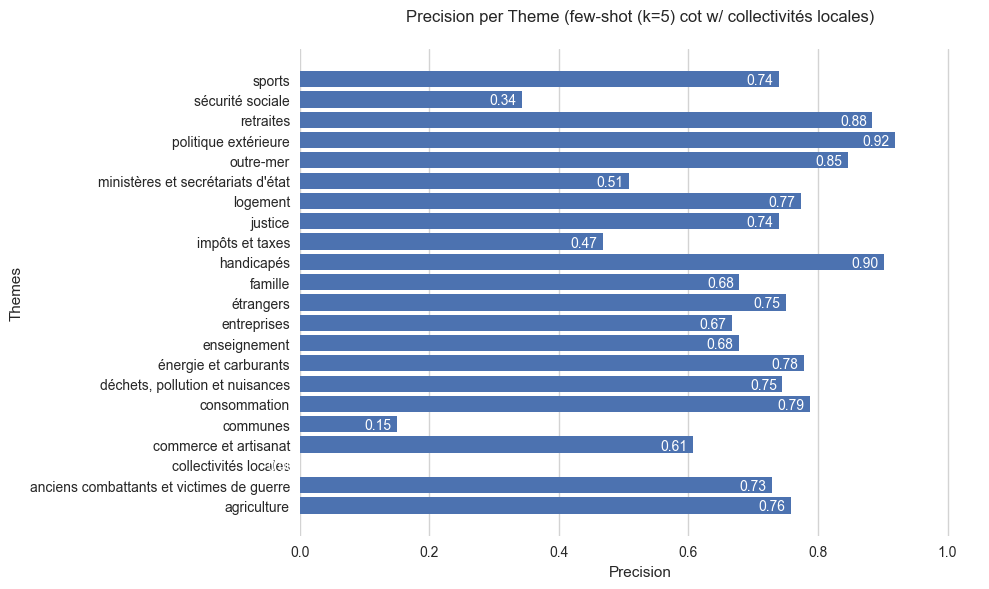

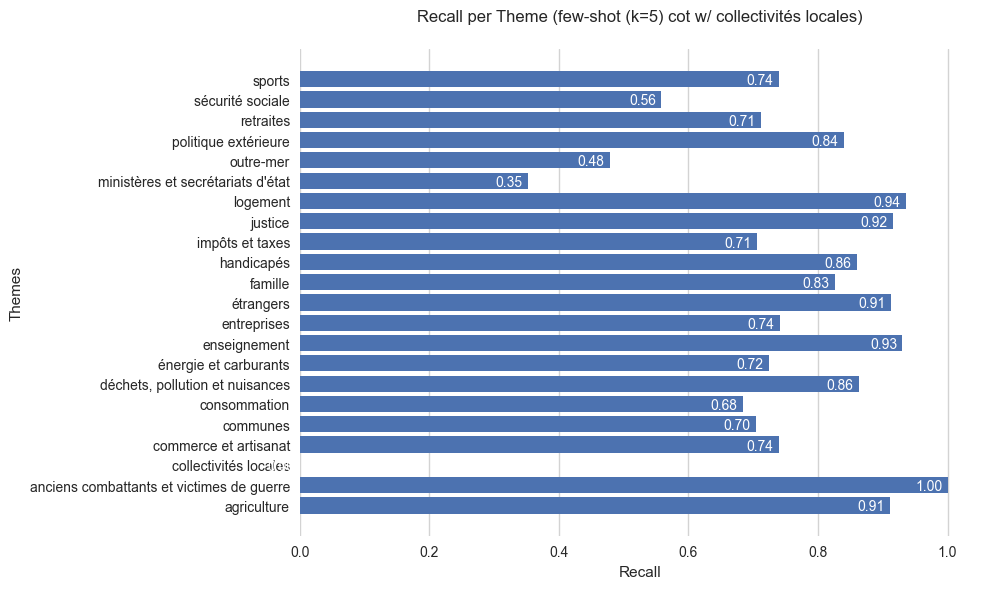

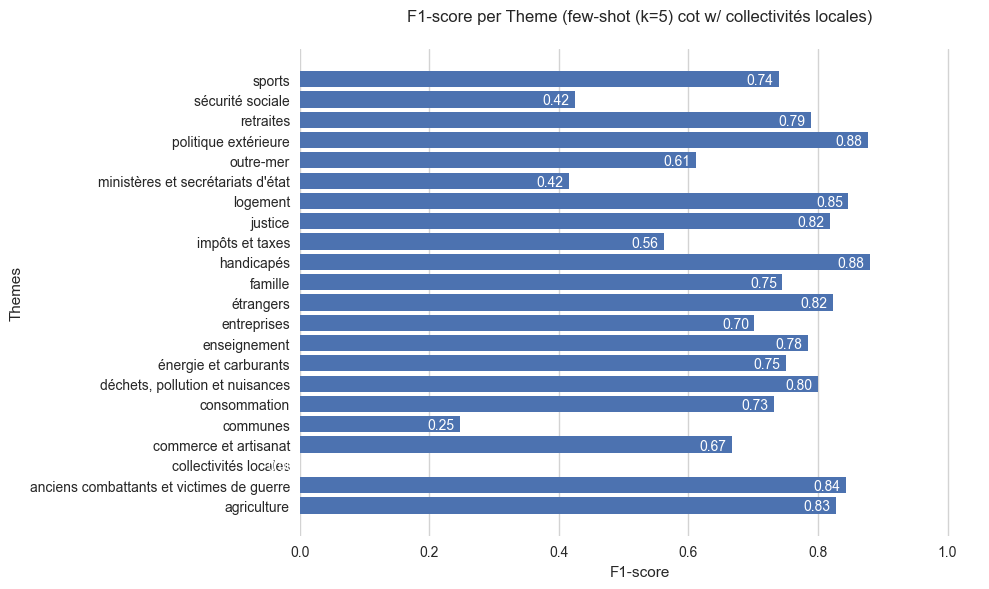

In [9]:
plot_precision(RUN_IDS[2], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[2], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[2], save_folder="images/experience_7/metrics")

(analysis)

## Zero-shot Vanilla ("Collectivités territoriales")

(prompting strategy description)


In [10]:
print_prompts(RUN_INFOS[3]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



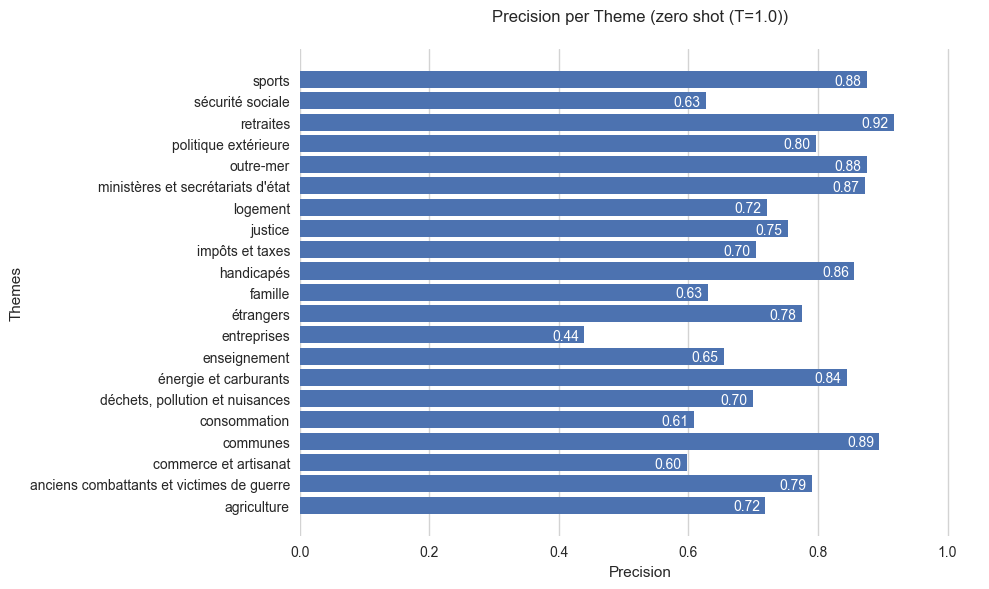

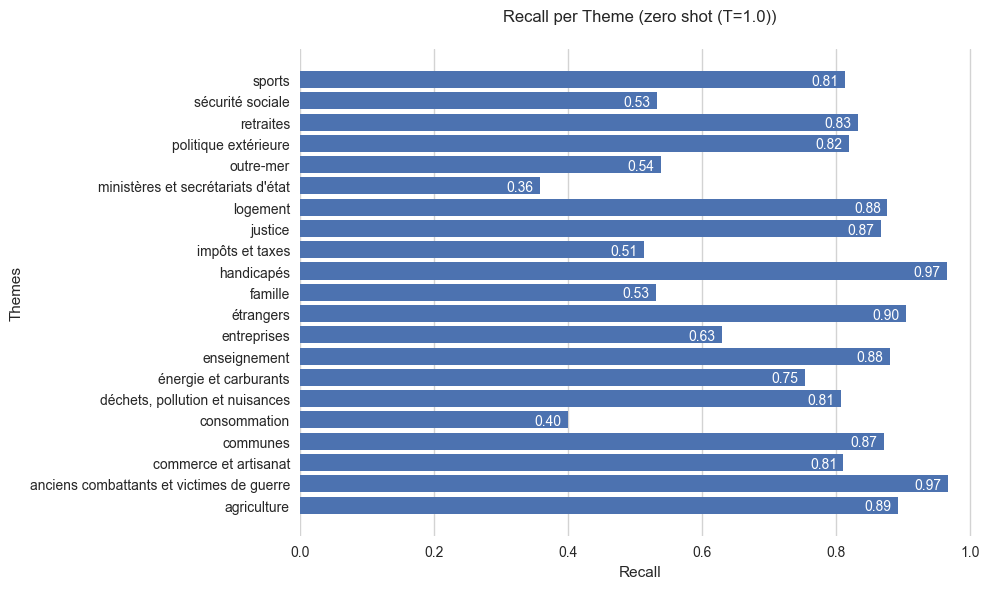

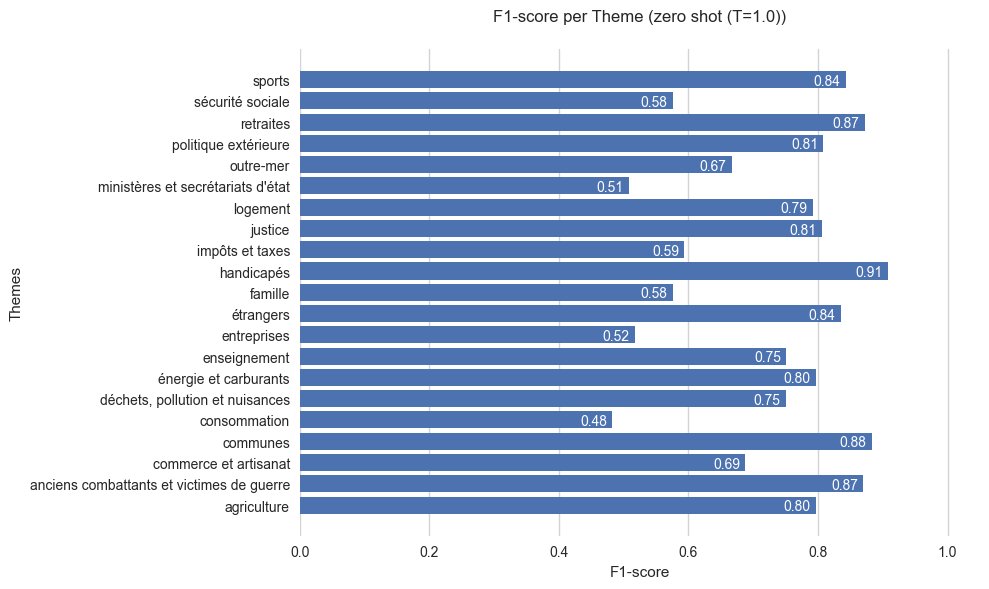

In [11]:
plot_precision(RUN_IDS[3], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[3], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[3], save_folder="images/experience_7/metrics")

(analysis)

## Zero-shot Verbalized Confidence ("Collectivités territoriales")

(prompting strategy description)


In [12]:
print_prompts(RUN_INFOS[4]["prompts"])

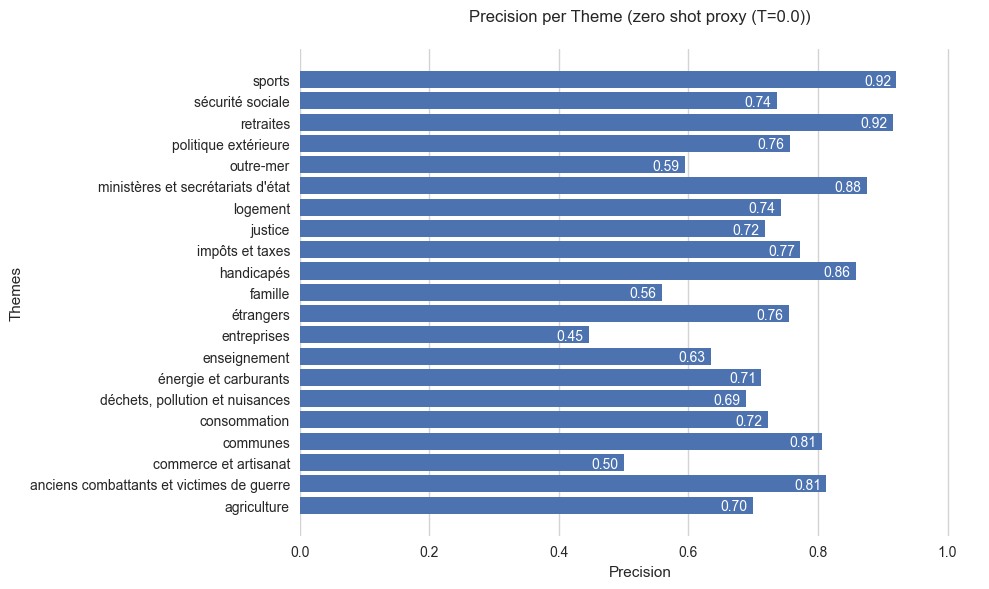

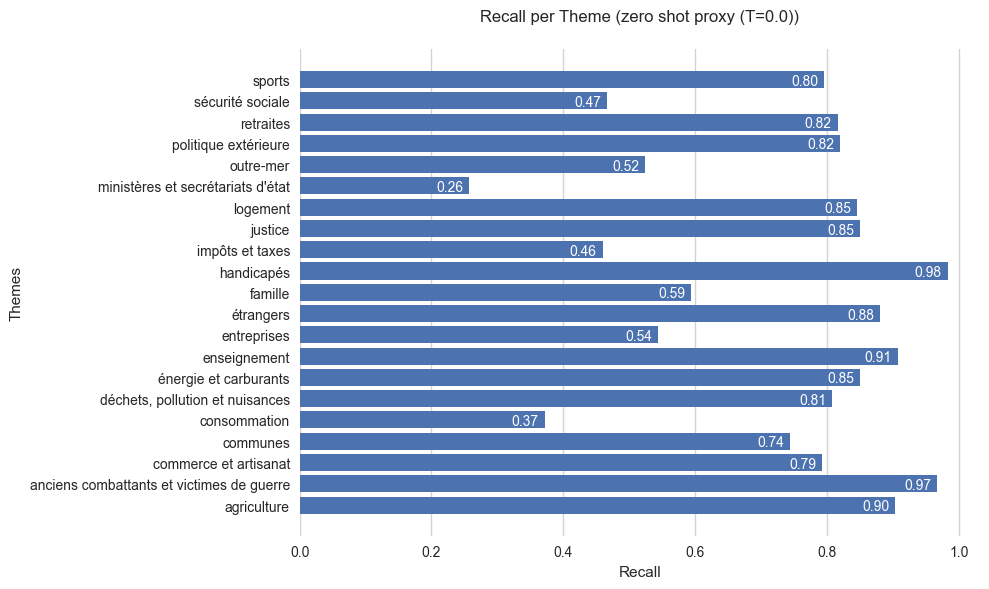

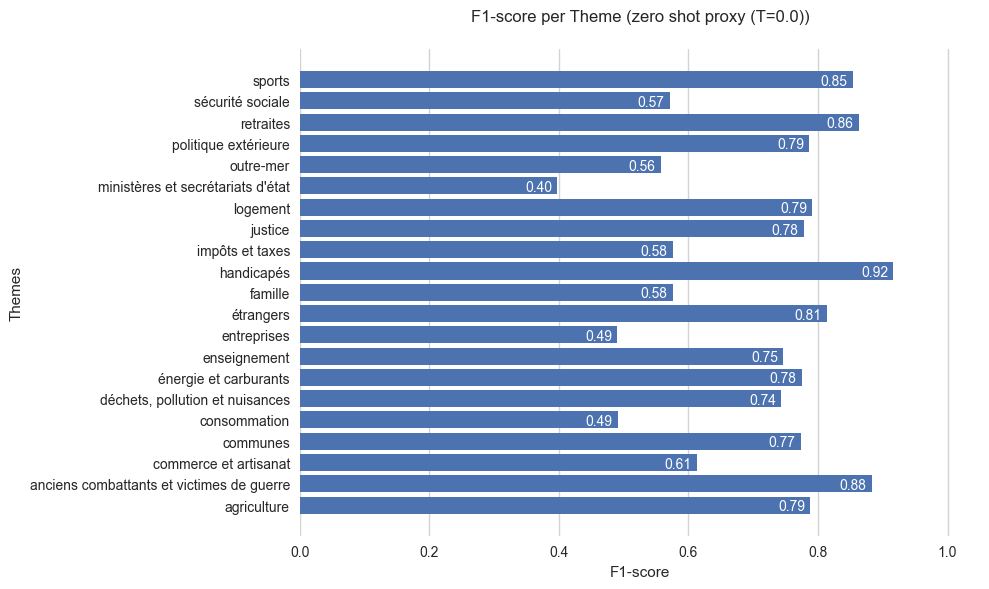

In [13]:
plot_precision(RUN_IDS[4], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[4], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[4], save_folder="images/experience_7/metrics")

(analysis)

## Zero-shot Self-Calibration ("Collectivités territoriales")

(prompting strategy description)


In [14]:
print_prompts(RUN_INFOS[5]["prompts"])

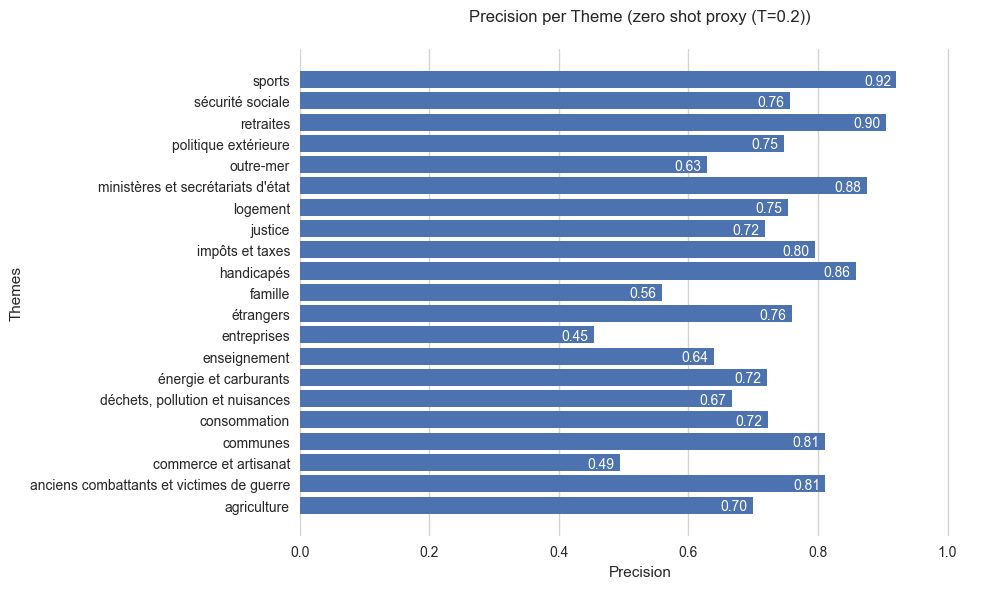

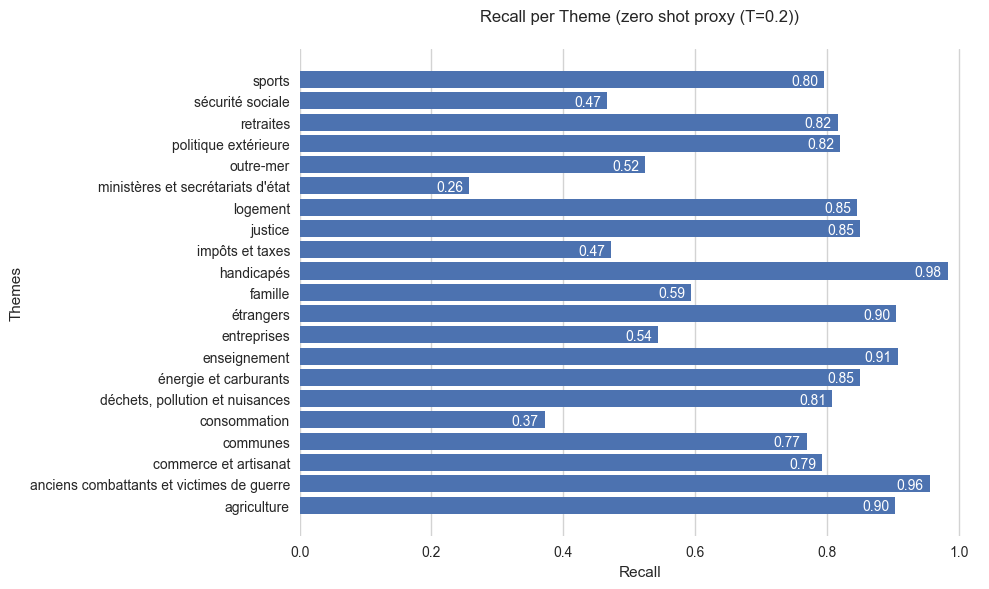

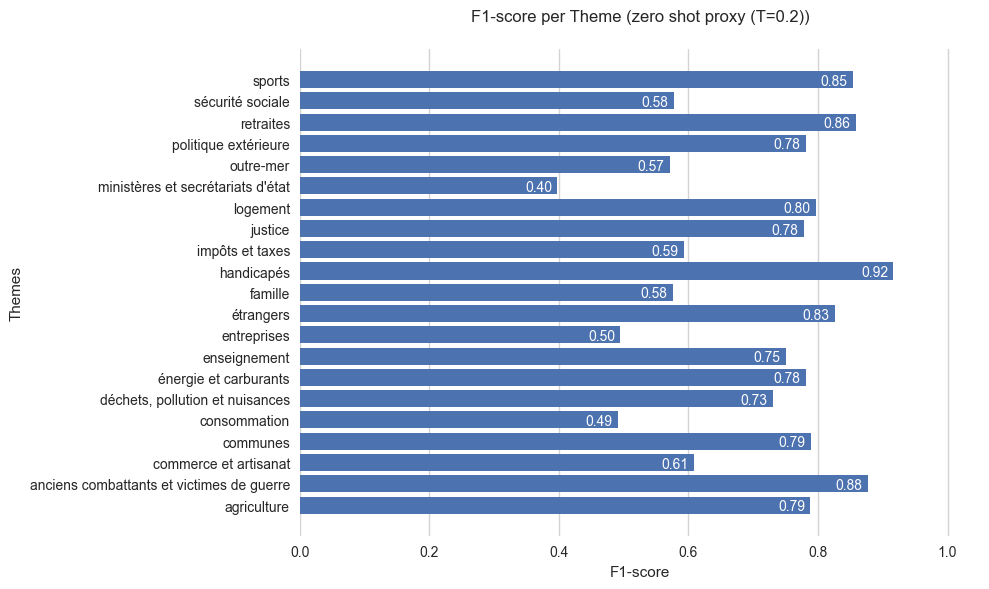

In [15]:
plot_precision(RUN_IDS[5], save_folder="images/experience_7/metrics")
plot_recall(RUN_IDS[5], save_folder="images/experience_7/metrics")
plot_f1_score(RUN_IDS[5], save_folder="images/experience_7/metrics")

(analysis)

## Comparing the strategies


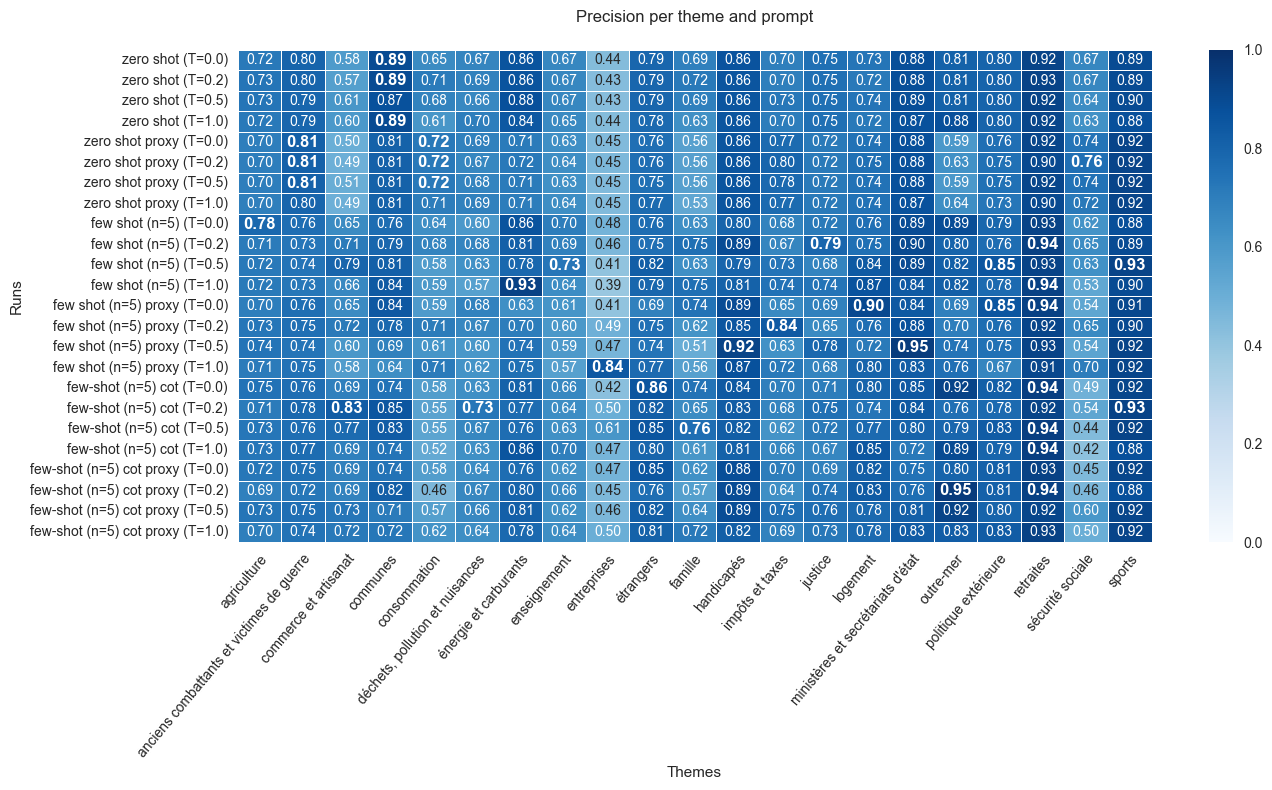

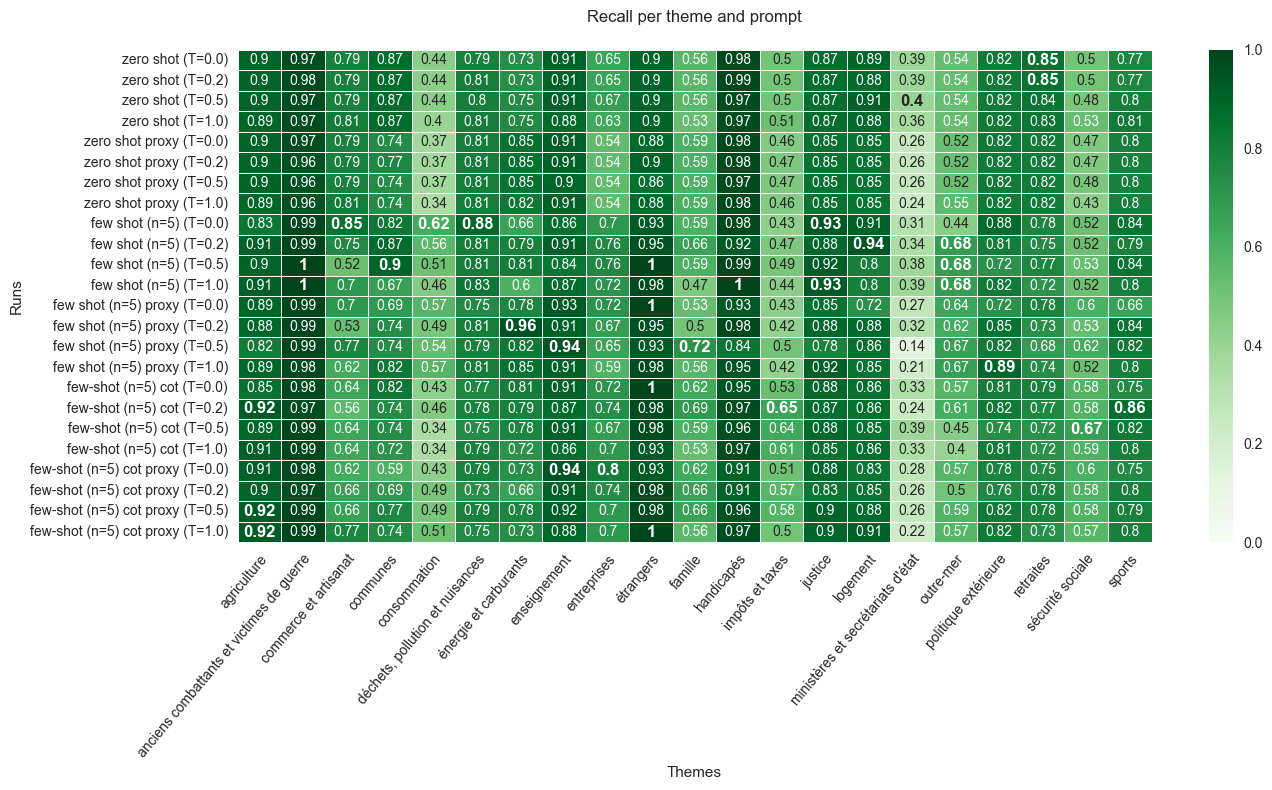

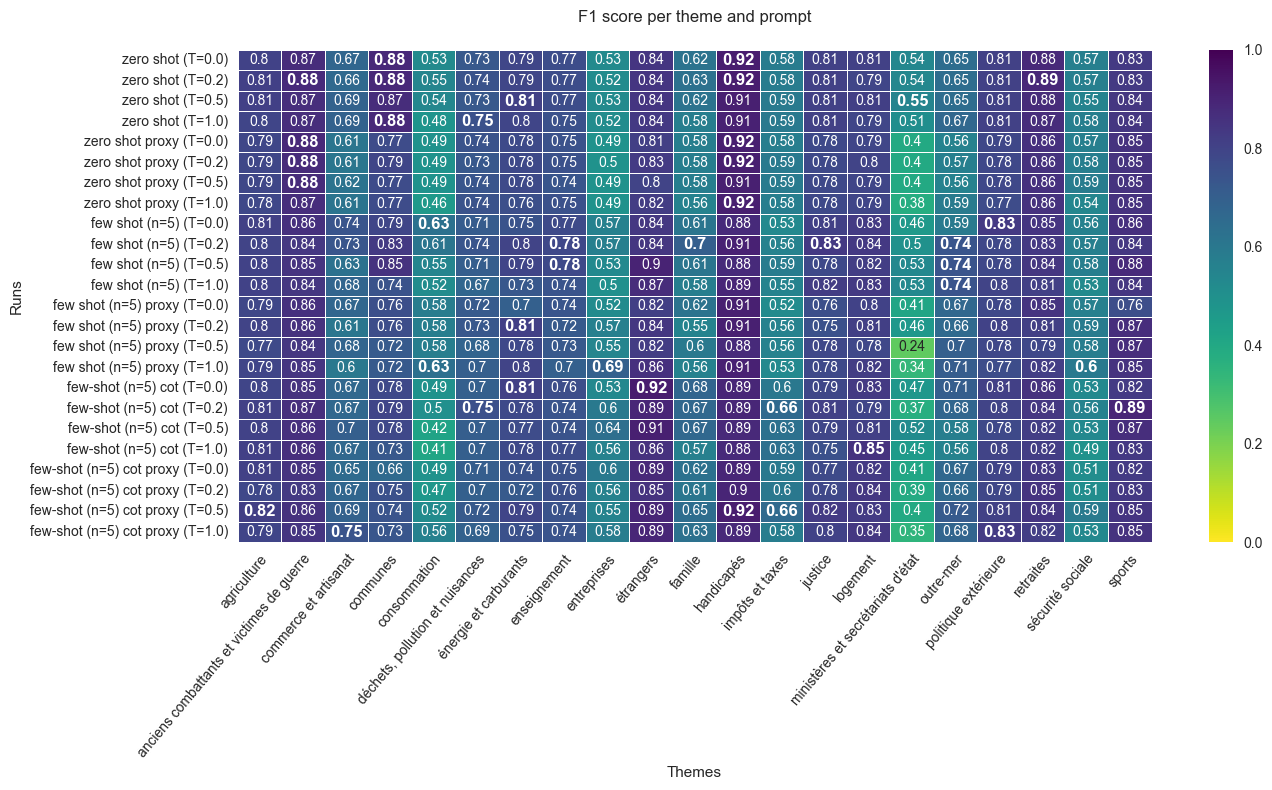

In [52]:
plot_precision_heatmap(RUN_IDS, save_folder="images/experience_7/metrics")
plot_recall_heatmap(RUN_IDS, save_folder="images/experience_7/metrics")
plot_f1_score_heatmap(RUN_IDS, save_folder="images/experience_7/metrics")

(analysis)

### Inter-coder agreement (Cohen’s Kappa / Krippendorff’s alpha)

Here, we take at the **inter-coder agreement** between every runs. The first metrics we're looking for is the **Krippendorff's Alpha**, which measures the degree of agreement between different annotators beyond what would be expected by chance. In other words, it tells you how much the annotators agree with each other when categorizing or labeling items, considering the possibility of random agreement.

Krippendorff’s Alpha ranges from -1 to 1:

- **1** means perfect agreement: All annotators classified every item the same way.
  - 0.81 - 1.00 : Almost perfect agreement;
  - 0.61 - 0.80 : Substantial agreement;
  - 0.41 - 0.60 : Moderate agreement;
  - 0.21 - 0.40 : Fair agreement;
  - 0.00 - 0.20 : Slight agreement.
- **0** means no agreement beyond what would be expected by chance.
- **Negative values** indicate that the agreement is worse than chance, meaning there is systematic disagreement among annotators.


In [53]:
print(f"Krippendorff's alpha : {compute_krippendorff_alpha(RUN_IDS):.2f}")

Krippendorff's alpha : 0.89


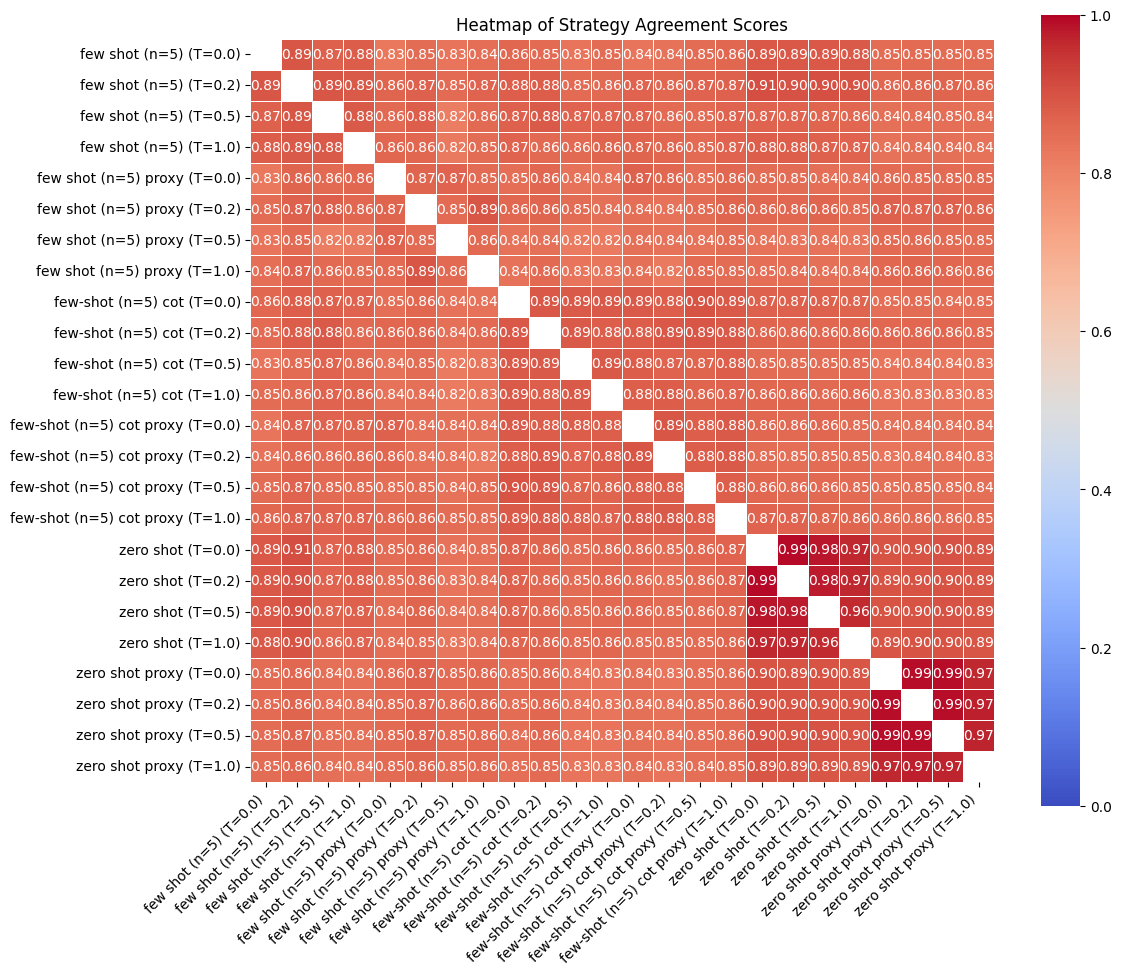

In [54]:
plot_cohen_kappa(RUN_IDS)

(analysis)

## Confidence

(description)


100%|████████████████████████████████████| 1494/1494 [00:00<00:00, 1905.75it/s]


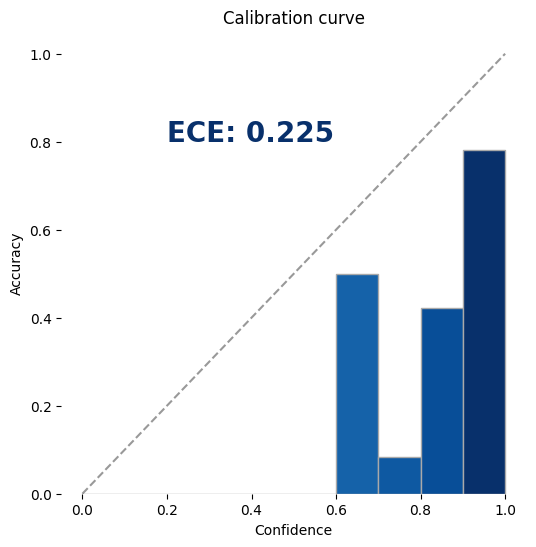

In [55]:
plot_confidence_calibration_curve(RUN_IDS[0], ConfidenceType.Logprobs)

## Statistical tests

(description)


In [56]:
# plot_stats(RUN_IDS)